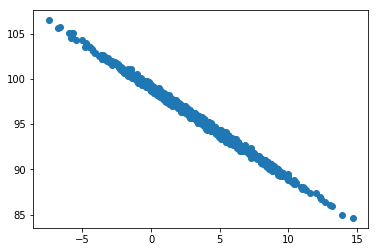

In [65]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

PageSpeed = np.random.normal(3.0, 3.5, 1000) #BY INCREASING VARIANCE(middle one) WE CAN GET good r-value
PurchaseAmount = 100 - (PageSpeed + np.random.normal(1.0, 0.2, 1000))

scatter(PageSpeed, PurchaseAmount)
                        

In [66]:
#as we have only 2 features (list of page speed and list corresponding purchase amount, 
#we can keep it simple and call scipy.stats.linregress
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(PageSpeed, PurchaseAmount)
#slope and intercept needs to define the best fit line
#r_value used to measure r-squared (to measure the quality that fits)

In [67]:
r_value ** 2

0.9967812248248188

###  r-squared value is almost equal to 1 means our line is a good fit among our set of observations

### Use slope and intercept which we got from regression to plot predicted vs actual values

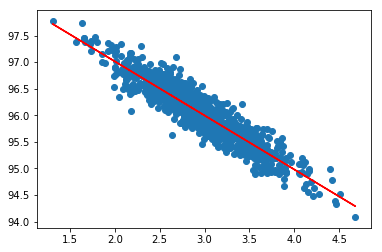

In [49]:
def predict(x):
    return slope * x + intercept

fitLine = predict(PageSpeed)

plt.scatter(PageSpeed, PurchaseAmount)
plt.plot(PageSpeed, fitLine, c='r')
plt.show()

### Polynomial Regression

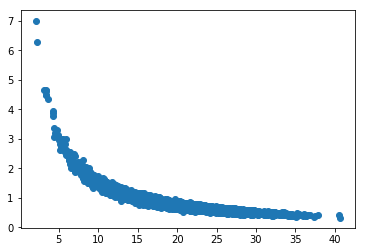

In [129]:
np. random.seed(2) # to keep and start with same initial set of points
PgSpeed = np.random.normal(20.0, 5, 10000)
PucAmount = np.random.normal(15.0, 1.0, 10000)/PgSpeed

scatter(PgSpeed, PucAmount)

In [136]:
#let's cnstruct nth degree polynomial model of our data that minimizes the squared-errors
x = np.array(PgSpeed)
y = np.array(PucAmount)

p = np.poly1d(np.polyfit(x,y,5))

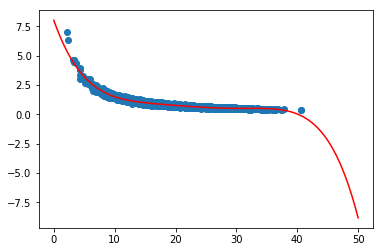

In [137]:
#let's visualize the plot with predicted vs actual values with range of 0-7 page speed

xp = np.linspace(0, 50, 100)#here i given page speed range 0-50 (can change depends on your train data)

plt.scatter(x,y)
plt.plot(xp, p(xp), c='r')
plt.show()

### Let's measure the r-sqaured error

In [138]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p(x))
r2

0.9552383212496857

### Multivariate Regression

In [140]:
import pandas as pd

df  = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

In [141]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [156]:
#let's scale our features into some range so we can easily compare co-efficients
#categorical data (Make and Model)should be numerical otherwise it won't work with regression models
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
#features on x-axis which we consider to help for prediction
x = df[['Mileage', 'Cylinder', 'Doors', 'Sound']]
#value i'm tryint to predict on y-axix
y = df['Price']

#normalize the data (if features have -1, they will be converted as 1) scale.fit_transform will does all this stuff
x[['Mileage', 'Cylinder', 'Doors', 'Sound']] = scale.fit_transform(x[['Mileage', 'Cylinder', 'Doors', 'Sound']].as_matrix())

print (x)

#let's construct OLS (ordinary least sqaures model) using stats model based on features and target (price)

est = sm.OLS(y,x).fit()
est.summary()

C:\Users\Palugudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Users\Palugudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Palugudi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Palugudi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Palugudi\Anac

      Mileage  Cylinder     Doors     Sound
0   -1.417485  0.527410  0.556279  0.687406
1   -1.305902  0.527410  0.556279  0.687406
2   -0.810128  0.527410  0.556279  0.687406
3   -0.426058  0.527410  0.556279 -1.454744
4    0.000008  0.527410  0.556279 -1.454744
5    0.293493  0.527410  0.556279  0.687406
6    0.335001  0.527410  0.556279  0.687406
7    0.382369  0.527410  0.556279  0.687406
8    0.511409  0.527410  0.556279 -1.454744
9    0.914768  0.527410  0.556279  0.687406
10  -1.171368  0.527410  0.556279 -1.454744
11  -0.581834  0.527410  0.556279  0.687406
12  -0.390532  0.527410  0.556279  0.687406
13  -0.003899  0.527410  0.556279  0.687406
14   0.430591  0.527410  0.556279  0.687406
15   0.480156  0.527410  0.556279  0.687406
16   0.509822  0.527410  0.556279 -1.454744
17   0.757160  0.527410  0.556279  0.687406
18   1.594886  0.527410  0.556279  0.687406
19   1.810849  0.527410  0.556279  0.687406
20  -1.326046  0.527410  0.556279  0.687406
21  -1.129860  0.527410  0.55627

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     13.87
Date:                Thu, 18 Oct 2018   Prob (F-statistic):           6.09e-11
Time:                        16:38:24   Log-Likelihood:                -9206.6
No. Observations:                 804   AIC:                         1.842e+04
Df Residuals:                     800   BIC:                         1.844e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1298.0128    804.922     -1.613      0.107   -2878.021     281.996
Cylinder    5509.7280    807.769      6.821      0.000    3924.132    7095.324
Doors      -1458.5466    805.818     -1.810      0.071   -3040.313     123.220
Sound       -859.2904    809.301     -1.062      0.289   -2447.894     729.313
==============================================================================
Omnibus:                      165.430   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.695
Skew:                           1.296   Prob(JB):                     1.84e-61
Kurtosis:                       4.276   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### as we seen above, number of cylinders will more influence on predicting the price of car for this perticular model, so we shoudl consider it is the important feature for predicting prices of this model car

In [150]:
#let's check how it worths our prediction model
#check about doors 
y.groupby(df.Doors).mean()
# as we seen, no big difference of price for 2 doors car and 4 doors car

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [152]:
y.groupby(df.Cylinder).mean()
#made big difference of 4 cylinders car to 8 cylinders car

Cylinder
4    17862.564874
6    20081.395841
8    38968.043180
Name: Price, dtype: float64

In [161]:
y.groupby(df.Sound).mean()
#no big difference

Sound
0    23130.144379
1    20498.736885
Name: Price, dtype: float64

In [157]:
y.groupby(df.Mileage).mean()
#makes sense

Mileage
266      10813.343521
583      70755.466717
636      25948.962594
788      48310.329545
865      16116.843916
881      17360.810635
932      19446.882941
1160     14584.448122
1169     15635.796160
1480     19164.610627
1592     19822.115392
1676     35033.215454
1737     14739.067236
1787     20021.195206
1853     21757.049509
2189     19567.259291
2202     51154.047216
2295     23197.436790
2308     25589.983155
2392     15110.192598
2464     14894.982593
2616     48365.980897
2846     42741.523666
2879     16916.869535
2973     16927.779761
2992     20698.077083
3625     46732.606030
3629     12649.110893
3828     37088.562413
3867     32197.340466
             ...     
34191    31186.741463
34269    26012.374625
34447    11149.618304
34621     9919.048185
34665    17968.838278
34815    12741.190233
34998    11521.525888
35157    27666.231078
35299     8768.998585
35326    32038.339563
35624    16216.980706
35662    13585.636802
36074    32954.141336
36480    25527.013027
36